<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 05: GeoVisualization </h3>

# GeoVisualization 

* Process of interactively visualizing geographic information in any of the steps in spatial analyses, 
* Originated in cartography, geovis was pioneered under the ledership of Alan MacEachren (Penn State), who developed tools and methods for interactive exploratory data analysis. 
* A core argument for geovisualization is that visual thinking using maps is integral to the scientific process and hypothesis generation, and the role of maps grew beyond communicating the end results of an analysis or documentation process. 
* Geovis interacts with cartography, visual analytics, information visualization, scientific visualization, statistics, computer science, art-and-design, and cognitive science. 

*Source: https://gistbok.ucgis.org/bok-topics/geovisualization* 

|||
|---|---|
|<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig1b_350.png">|<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig1a-350v.png">|
|Cartography Cube|Swoopy Framework|

# What does geoviz look like in practice? 

<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig3_0.png">

# Skills for GeoVisualization 

* GUI-based tools and scripting languages (Processing, Python, D3JS)
* Data processing skills
* Analytical skills (statistics)
* Visualization skills

# Typical Geovisualization Workflow 

* Raw data contains more information than we can visualize effectively 
* Thus, good understanding of visulization techniques is required 
    * cluttered displays, overplotting
    * --> aggregate data, highlighting interesting aspects of data
    * if visualization is interative a **user** can explore the data and find **interesting** 
* visual displays 
* visual variables (Bertin) 
* UI and UX design 

# Typical Data Analysis (Lab) Workflow 

* **Find the data (Cal Fire)**
* **Pre-process the data: import, inspect visually, look at missing values, filter, drop.**
* **Exploratory Data Analysis (GEOVIZ). Generate visual and pose interesting questions about data (descriptive statistics)**
* Data Analysis (inferential statistics) 
* Present Findings

# Data Analysis Example - California Wildfires 

1. Finding data 
    1. Calfire publishes data in .gdb format, which is not straight-forward to analyze in Python (What software can we use to analyze it?) 
    2. Use terminal command 'wget' to download the data via URL from the internet 
    3. Find and download mannually ([try it now](https://gis.data.ca.gov/maps/CALFIRE-Forestry::california-fire-perimeters-all-1))
    4. Host on web services that provide readable url links and read via Pandas 'read_csv' function

# Brainstorm Exercise

> Working with your table, illicit interesting questions about wildfires in CA

> Think about variables that are already in the data set 
 
> What new variables can we generate that will help us answer the questions 

In [1]:
# copied form the lab 

# Data Analysis Example - California Wildfires 

2. Pre-process the data 
    1. remove variables that you will not be using (if necessary) 
    2. subset the data to your study area 
    3. convert variables for calculation (float --> int; string --> datetime; etc.) 

# Note on naming conventions in Python

* Never use the characters ‘l’ (lowercase letter el), ‘O’ (uppercase letter oh), or ‘I’ (uppercase letter eye) as single character variable names. In some fonts, these characters are indistinguishable from the numerals one and zero. When tempted to use ‘l’, use ‘L’ instead.
* Class names should normally use the CapWords convention. But we do not use classes in this class! 
* Function names should be lowercase, with words separated by underscores as necessary to improve readability. Variable names follow the same convention as function names.

More info in official [Python docs](https://peps.python.org/pep-0008/#prescriptive-naming-conventions) 

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fires = gpd.read_file('https://github.com/barguzin/geo_data/raw/main/fires.zip')
print(fires.shape) 
print(type(fires))

(5250, 8)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [8]:
fires.head()

,YEAR_,INC_NUM,UNIT_ID,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,geometry
0,2020,00013212,NEU,2020-06-18,2020-06-23,11.0,109.602280,"POLYGON ((-116841.251 97942.565, -116286.032 9..."
1,2020,00011799,NEU,2020-06-01,2020-06-04,2.0,685.585022,"POLYGON ((-117328.400 90212.407, -117226.732 8..."
2,2020,00007619,NEU,2020-03-31,2020-04-01,9.0,12.931545,"POLYGON ((-110213.270 105975.579, -110066.641 ..."
3,2020,00008471,NEU,2020-04-14,2020-04-19,18.0,10.315964,"POLYGON ((-111793.600 164243.615, -111624.716 ..."
4,2020,00015865,BEA,2020-07-15,2020-07-16,14.0,376.910400,"POLYGON ((-118955.900 122883.508, -118926.056 ..."


<AxesSubplot:xlabel='YEAR_'>

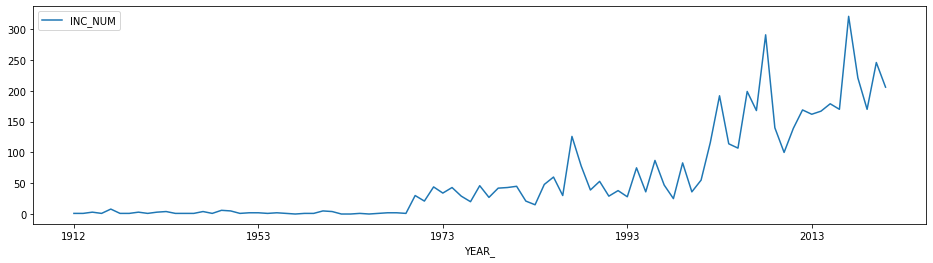

In [74]:
fires_per_year = fires.groupby("YEAR_")["INC_NUM"].count().reset_index()
fires_per_year.set_index('YEAR_', inplace=True)
fires_per_year.plot(figsize=(16,4))

In [41]:
# subset the data to only include one year 
fires2021 = fires.loc[fires['YEAR_']=='2021']
print(fires2021.shape) 

# drop a variable 
fires2021.drop('UNIT_ID', inplace=True, axis=1) 

# convert data types 
fires2021['ALARM_DATE'] = pd.to_datetime(fires2021.ALARM_DATE)
fires2021['CONT_DATE'] = pd.to_datetime(fires2021.CONT_DATE)

# calculate duration
fires2021['dur_days'] = (fires2021.CONT_DATE - fires2021.ALARM_DATE).dt.days

# get the month start of fires 
fires2021['month_started'] = fires2021.ALARM_DATE.dt.month

(207, 8)


C:\Users\noibar\AppData\Local\Temp\ipykernel_12020\270685699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires2021.drop('UNIT_ID', inplace=True, axis=1)
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [43]:
# EXERCISE

fires2021['dow'] = fires2021.ALARM_DATE.dt.dayofweek # 0-Monday, 6-Sunday
fires2021.head()

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,YEAR_,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,geometry,dur_days,month_started,dow
5038,2021,00002246,2021-03-27,2021-03-29,18.0,873.391724,"POLYGON ((-134941.882 436471.047, -135837.750 ...",2,3,5
5039,2021,00000468,2021-01-19,2021-01-22,9.0,20.307356,"MULTIPOLYGON (((-189428.399 -101523.942, -1894...",3,1,1
5040,2021,00000489,2021-01-19,2021-01-22,11.0,33.259224,"MULTIPOLYGON (((-163472.149 -114234.730, -1633...",3,1,1
5041,2021,00000490,2021-01-19,2021-01-22,11.0,19.725822,"POLYGON ((-189028.449 -89148.863, -189013.258 ...",3,1,1
5042,2021,00000508,2021-01-19,2021-01-21,9.0,21.936876,"MULTIPOLYGON (((-192632.039 -90258.236, -19255...",2,1,1


In [46]:
fires2021.dtypes

YEAR_                    object
INC_NUM                  object
ALARM_DATE       datetime64[ns]
CONT_DATE        datetime64[ns]
CAUSE                   float64
GIS_ACRES               float64
geometry               geometry
dur_days                  int64
month_started             int64
dow                       int64
dtype: object

# Exploratory Data Analysis

1. Think about how numbers (statistics), non-spatial plots and geographic maps can help answer the questions you posed in the previous exercise? 

> useful Python functions: groupby(), reset_index(), set_index(); mean(), median(), sum(); plot(); 

average duration of fires in 2021: 20.40096618357488


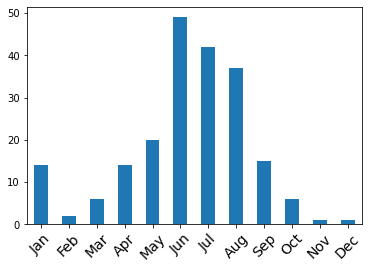

In [59]:
# find average dur of fires 
print('average duration of fires in 2021:', fires2021.dur_days.mean())

# add labels 
labs = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# get unique values and tally them 
# this works well for count() function 
# when you need to calculate total number of something
ax = fires2021.month_started.value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(labs, rotation=45, fontsize=14);

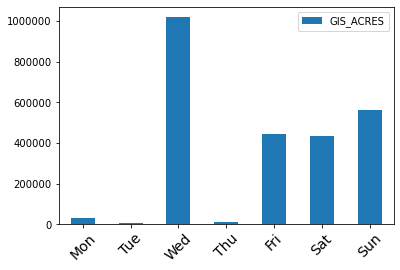

In [71]:
from matplotlib.ticker import FormatStrFormatter
# another way to aggregate data 
# when you need mean() or sum()
# total acreage by day of week for start of the fire 
fires_per_dow = fires2021.groupby('dow')['GIS_ACRES'].sum().reset_index()
fires_per_dow.set_index("dow", inplace=True)

# add labels 
labs = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = fires_per_dow.plot(kind='bar')
ax.set_xticklabels(labs, rotation=45, fontsize=14);
ax.set_xlabel(''); # remove 'dow' label 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))